[*********************100%%**********************]  1 of 1 completed
C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


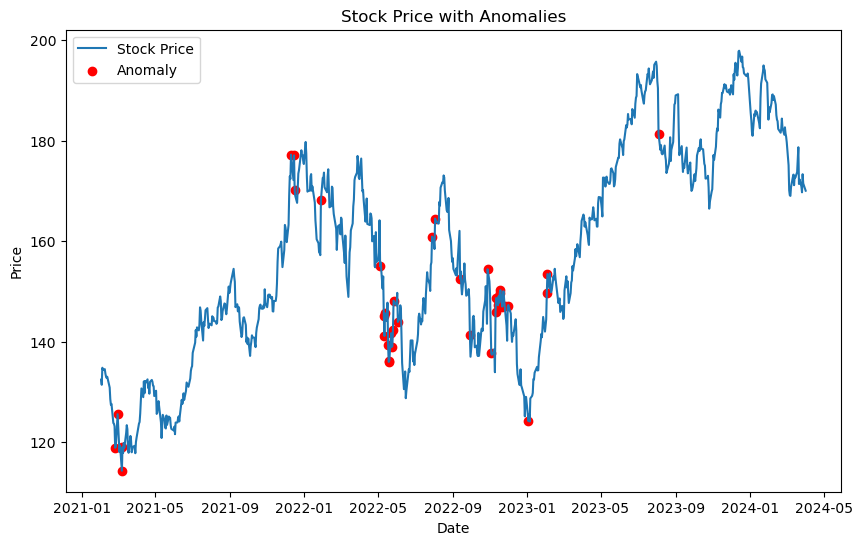

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import yfinance as yf
from datetime import datetime

# Function to fetch historical stock price data from Yahoo Finance
def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

# Function to preprocess stock price data and extract relevant features
def preprocess_data(stock_data):
    # Calculate percentage change
    stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()
    
    # Calculate rolling mean and standard deviation of daily returns
    window_size = 20
    stock_data['Rolling_Mean'] = stock_data['Daily_Return'].rolling(window=window_size).mean()
    stock_data['Rolling_Std'] = stock_data['Daily_Return'].rolling(window=window_size).std()
    
    # Drop rows with NaN values resulting from rolling calculations
    stock_data.dropna(inplace=True)
    
    # Select relevant features for anomaly detection
    features = ['Daily_Return', 'Rolling_Mean', 'Rolling_Std']
    return stock_data[features]

# Function to detect anomalies using Isolation Forest
def detect_anomalies(data):
    # Initialize Isolation Forest model
    isolation_forest = IsolationForest(contamination=0.05, random_state=42)
    
    # Fit the model to the data
    isolation_forest.fit(data)
    
    # Predict anomalies (outliers)
    anomalies = isolation_forest.predict(data)
    
    return anomalies

# Function to visualize anomalies in stock price data
def visualize_anomalies(stock_data, anomalies):
    # Add a column for anomaly flag to the stock data
    stock_data['Anomaly'] = anomalies
    
    # Visualize anomalies using matplotlib or other plotting libraries
    # Example: Plot stock price along with detected anomalies
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Adj Close'], label='Stock Price')
    plt.scatter(stock_data.index[anomalies == -1], stock_data['Adj Close'][anomalies == -1], color='red', label='Anomaly')
    plt.title('Stock Price with Anomalies')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Main function
def main():
    # Define stock symbol, start date, and end date for data fetching
    symbol = 'AAPL'  # Example: Apple Inc.
    start_date = '2021-01-01'
    end_date = datetime.today().strftime('%Y-%m-%d')  # Today's date
    
    # Fetch historical stock price data
    stock_data = fetch_stock_data(symbol, start_date, end_date)
    
    # Preprocess data and extract relevant features
    processed_data = preprocess_data(stock_data)
    
    # Detect anomalies using Isolation Forest
    anomalies = detect_anomalies(processed_data)
    
    # Visualize anomalies
    visualize_anomalies(stock_data, anomalies)

if __name__ == "__main__":
    main()
